# Simple Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

We would like to solve the equations of motion for a particle of mass m under the harmonic potential. First we will investigate the analytical solution. Then, we will use the velocity Verlet algorithm to obtain the numerical solution for given initial conditions. Finally, we will try to interpolate the given data set.

First, we would like to build the problem analytically, then try to interpret the data we are provided with. We have a particle of mass m under the harmonic potential whose position and velocity is determined as below.

$$x(t) = x(0) \cos(\omega t)$$
$$\dot x(t) = -\omega x(0)\sin(\omega t)$$

The total energy is given by $E = K + U $ where $K = \frac{1}{2} m \dot x^2(t)$ and $U = \frac{1}{2} m \omega^2 x^2(t) $. By the conservation of energy, we know that $E$ is constant over time.

## Analytical Solution

In [2]:
# Building the problem analytically

x0, v0, m, k = 1, 0, 1, 1 
w = (k/m)**0.5
t = np.linspace(0,10,100)
x = x0*np.cos(w*t)
v = -x0*w*np.sin(w*t)
U = 0.5*k*x**2
K = 0.5*m*v**2
E = K + U

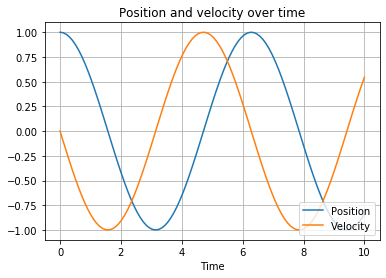

In [3]:
# Plot the position and velocity over time

plt.plot(t,x,label="Position")
plt.plot(t,v,label="Velocity")
plt.title("Position and velocity over time")
plt.xlabel("Time")
plt.grid()
plt.legend(loc="lower right")
plt.show()

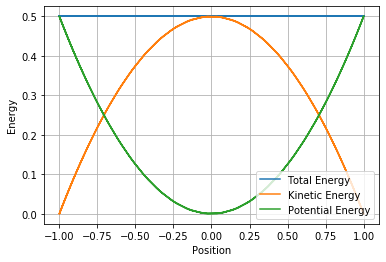

In [4]:
# Plot the energy over position

plt.plot(x,E,label="Total Energy")
plt.plot(x,K,label="Kinetic Energy")
plt.plot(x,U,label="Potential Energy")
plt.xlabel('Position')
plt.ylabel('Energy')
plt.grid()
plt.legend(loc="lower right")
plt.show()

Now we try to calculate the derivative of the potential with respect to position at a given point

I will update the derive function such it is suitable to compute the derivative of interpolating function (this step is necessary for future use)

## Numerical Solution

### Numerical derivative of a function

In [5]:
def derive(f,a,h):
    
    return (f(a+h) - f(a-h))/(2*h)

def create_interp(x,V):
    
    f = interpolate.interp1d(x,V,kind="cubic",fill_value="extrapolate")
    
    return f

Even though it is useless to interpolate the analytical form of the potential ($x^2$) at his moment, it will be more convenient when we want to read the data from the text.

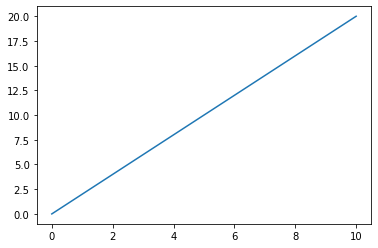

In [6]:
# a few lines to test the function derive()

y = np.linspace(0,10)   # will replace our x
h_y = y**2             # will replace our V

f_int = create_interp(y,h_y)   # will correspond to our interpolating function

g_y = derive(f_int,y,0.01) 

plt.plot(y,g_y)
plt.show()

### Velocity Verlet algorithm to solve SHO problem

Using the velocity Verlet algorithm with the following steps:

1. Calculate $\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}(t) \Delta t+\frac{1}{2} \vec{a}(t) \Delta t^{2}$
2. Derive $\vec{a}(t+\Delta t)$ from the interaction potential using $\vec{x}(t+\Delta t)$
3. Calculate $\vec{v}(t+\Delta t)=\vec{v}(t)+\frac{1}{2}(\vec{a}(t)+\vec{a}(t+\Delta t)) \Delta t$

https://en.wikipedia.org/wiki/Verlet_integration#Velocity_Verlet

Note that in Verlet_SHO() function, we use the analytical form of the acceleration. In the following Verlet() function, we will derive the acceleration from the potential.

In [7]:
def Verlet_SHO(x0,v0,tmax,dt):
    """
    Inputs
    ------
    x0    : Initial position of the particle      (type:float)
    v0    : Initial velocity of the particle      (type:float)
    tmax  : Simulation time                       (type:float)
    dt    : Time step                             (type:float)
    
    This function returns the time evolution of the position, velocity, 
    and energy of a particle of unit mass under SHO potential. 
    """
    
    N = int(round(tmax/dt)); m = 1; t = 0; x = x0; v = v0; a = -(k*x)/m
    pos = []; vel = []; energy = []; time = []
    
    while(t<tmax):                     
              
            x_prev = x
            x = x_prev + v*dt + 0.5*(dt)**2 * a
            a_prev = a
            a = -(k*x)/m
            v_prev = v
            v = v_prev + 0.5*(dt)*(a + a_prev)
            E = 0.5*(v)**2 + 0.5*(x)**2
            t = t + dt
            
            pos.append(x)
            vel.append(v)
            energy.append(E)
            time.append(t)
     
    return(time,pos,vel,energy)

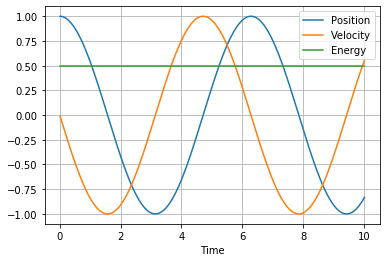

In [8]:
soln_SHO = Verlet_SHO(x0=1,v0=0,tmax=10,dt=0.01)
plt.plot(soln_SHO[0],soln_SHO[1],label='Position')
plt.plot(soln_SHO[0],soln_SHO[2],label='Velocity')
plt.plot(soln_SHO[0],soln_SHO[3],label='Energy')
plt.legend(loc='best')
plt.xlabel("Time")
plt.grid()
plt.show()

## Verlet Algorithm

In [9]:
def Verlet (x_V,V,m,x0,v0,tmax,dt):
    """
    Inputs
    ------
    x_v   : Spatial dependence of the potential   (type:list)
    V     : Potential                             (type:list)
    m     : Mass of the particle
    x0    : Initial position of the particle      (type:float)
    v0    : Initial velocity of the particle      (type:float)
    tmax  : Simulation time                       (type:float)
    dt    : Time step                             (type:float)
    
    This function returns the time evolution of the position, velocity, 
    and energy of a particle under an arbitrary position dependent potential.
    """

    t = 0
    x = x0
    v = v0
    V_int = create_interp(x_V,V)   # create the interpolating function with x_V and V
    a = -derive(V_int,x,dt)/m      # evaluate the derivative of the interpolating function at point x
    pos = []
    vel = []
    energy = []
    time = []

    while(t<tmax):                     
        
                    
            x_prev = x
            x = x_prev + v*dt + 0.5*(dt)**2 * a
            a_prev = a
            a = -derive(V_int,x,dt)/m
            v_prev = v
            E = 0.5*v*v + V_int(x)
            v = v_prev + 0.5*(dt)*(a + a_prev)
            t = t + dt
            
            pos.append(x)
            vel.append(v)
            energy.append(E)
            time.append(t)

            
        
 
    return(time,pos,vel,energy)             # return the solution

In [10]:
# a few lines to check whether interpolation scheme works.

x_test = np.linspace(0,100)
V_test = 0.5*x_test**2
test = Verlet(x_test,V_test,1,1,0,10,0.01)

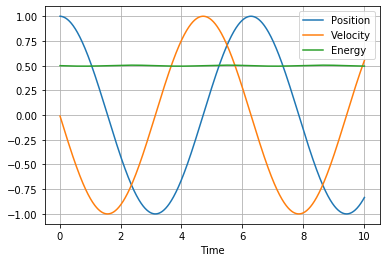

In [11]:
plt.plot(test[0],test[1],label='Position')
plt.plot(test[0],test[2],label='Velocity')
plt.plot(test[0],test[3],label='Energy')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

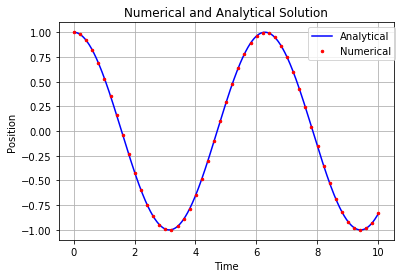

In [28]:
plt.plot(soln_SHO[0],soln_SHO[1],'b',label="Analytical")
plt.plot(test[0],test[1],'ro',label="Numerical", markeredgewidth=1,
         markersize=2.5, markevery=20)

plt.title("Numerical and Analytical Solution")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.grid()
plt.show()

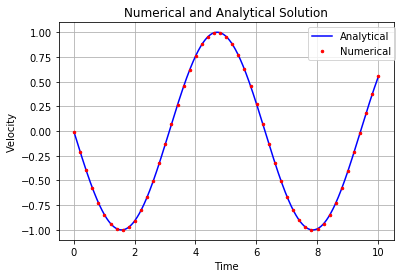

In [27]:
plt.plot(soln_SHO[0],soln_SHO[2],'b',label="Analytical")
plt.plot(test[0],test[2],'ro',label="Numerical", markeredgewidth=1,
         markersize=2.5, markevery=20)

plt.title("Numerical and Analytical Solution")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.grid()
plt.show()

### Comments

At first glance, the algorithm works well since the behaviour of the position and velocity agrees with the analytical solution. Also, the total energy is constant over time. The oscillations in the energy curve disappear with a choice of a smaller time step.